In [7]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
# Create the model class

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Flatten(start_dim=0),
            # Encoder
            nn.Linear(in_features=256*256*3, out_features=1024), 
            nn.ReLU(),
            # nn.Linear(in_features=1024, out_features=512),
            nn.Linear(in_features=1024, out_features=784),
            
            
            # nn.ReLU(),
            # nn.Linear(in_features=512, out_features=256),
            # nn.ReLU(),
            # nn.Linear(in_features=256, out_features=128), # -> latent space: 256 -> 128
        )

        self.decoder = nn.Sequential(
            # nn.Linear(in_features=128, out_features=256), 
            # nn.ReLU(),
            # nn.Linear(in_features=256, out_features=512),
            # nn.ReLU(),


            nn.Linear(in_features=784, out_features=1024),
            # nn.Linear(in_features=512, out_features=1024),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=256*256*3),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



auto_encoder_model = AutoEncoder().to(device)

In [9]:
from PIL import Image

image = Image.open('image.jpg')
image.width, image.height

from torchvision import transforms

image_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor()
])

image = image_transform(image)

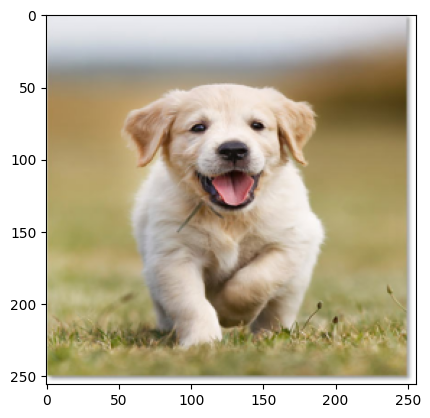

In [10]:
import matplotlib.pyplot as plt

plt.imshow(image.permute(1, 2, 0))

In [11]:
model_output = auto_encoder_model(image.to(device))

In [12]:
model_output

tensor([-0.0452, -0.0195,  0.0053,  ..., -0.0222,  0.0121, -0.0179],
       device='cuda:0', grad_fn=<ViewBackward0>)

In [13]:
model_output_reshaped = model_output.reshape(3, 256, 256)

In [14]:
model_output_reshaped

tensor([[[-4.5248e-02, -1.9478e-02,  5.3253e-03,  ...,  2.9277e-02,
          -1.4500e-02,  1.3959e-02],
         [-2.3456e-02, -2.0204e-02,  4.1453e-02,  ..., -5.8931e-03,
          -4.1989e-02,  8.4077e-03],
         [-7.9332e-02, -1.2641e-02,  6.8338e-02,  ...,  4.4154e-02,
           7.8245e-02, -1.7819e-02],
         ...,
         [-1.7125e-02,  5.5264e-02, -2.7517e-02,  ...,  1.8232e-02,
          -9.3505e-04, -9.2310e-02],
         [-1.4125e-02, -8.6725e-03, -3.5483e-02,  ..., -2.0515e-02,
          -6.0182e-02, -3.0576e-02],
         [ 2.8210e-02, -8.6827e-02, -4.2256e-03,  ..., -2.9521e-02,
           9.5437e-04,  7.1509e-02]],

        [[-2.5410e-02,  8.6608e-02,  7.0928e-03,  ...,  1.5293e-02,
           5.9332e-02, -6.4970e-03],
         [ 1.5973e-03, -5.5883e-03, -8.4249e-05,  ...,  5.7431e-03,
           4.9795e-03, -3.8936e-02],
         [-3.9315e-02, -4.7530e-02,  3.5354e-02,  ...,  2.8897e-02,
           3.5966e-02, -2.6800e-02],
         ...,
         [ 2.4736e-02, -5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19074565..0.17478092].


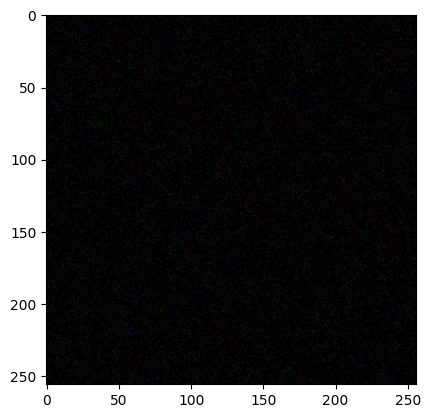

In [15]:
plt.imshow(model_output_reshaped.permute(1, 2, 0).detach().cpu())

In [16]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=auto_encoder_model.parameters(),
                             lr=0.001)

image.shape

torch.Size([3, 256, 256])

In [17]:
flatten_image = nn.Flatten(start_dim=0)
flat_image = flatten_image(image)

flat_image = flat_image.to(device)
image = image.to(device)

flat_image.device, flat_image.shape

(device(type='cuda', index=0), torch.Size([196608]))

In [18]:
# Training the autoencoder

num_epochs = 15

for epoch in range(num_epochs):
    # forward pass
    
    reconstructed_image = auto_encoder_model(image)
    loss = criterion(reconstructed_image, flat_image)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (epoch+1) % 5 == 0:
        print(f'Epoch Count: {epoch+1}/{num_epochs} | Loss: {loss:.4f}')

Epoch Count: 5/15 | Loss: 0.3871
Epoch Count: 10/15 | Loss: 0.1278
Epoch Count: 15/15 | Loss: 0.0921


In [19]:
# plt.imshow(image.permute(1, 2, 0).cpu())
image.shape

torch.Size([3, 256, 256])

In [20]:
after_train_output = auto_encoder_model(image)

after_train_output = after_train_output.reshape(3, 256, 256)

In [21]:
after_train_output.device, after_train_output.shape


(device(type='cuda', index=0), torch.Size([3, 256, 256]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.41708362..1.5353582].


Text(0.5, 1.0, 'Original Image')

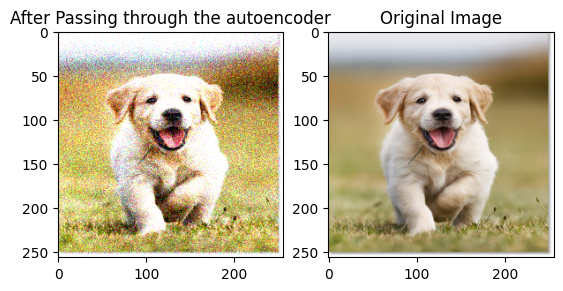

In [22]:
plt.subplot(1, 2, 1)
plt.imshow(after_train_output.permute(1, 2, 0).detach().cpu())
plt.title('After Passing through the autoencoder')

plt.subplot(1, 2, 2)
plt.imshow(image.permute(1, 2, 0).cpu())
plt.title('Original Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.41708362..1.5353582].


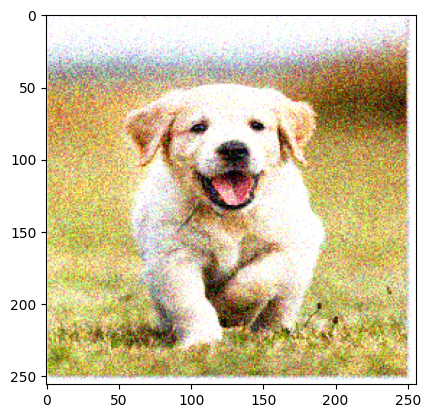

In [23]:
plt.imshow(after_train_output.permute(1, 2, 0).detach().cpu())

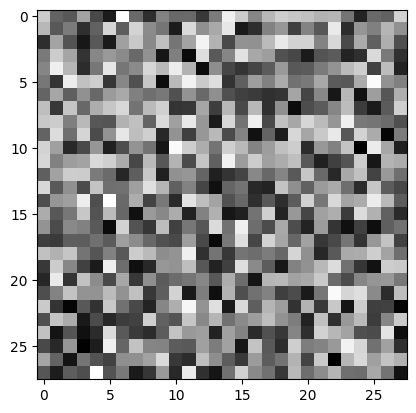

In [24]:
# Visualizing the output of only the encoder part of the model 

image.shape

output = auto_encoder_model.encoder(image)

output_reshaped = output.reshape(1, 28, 28).detach().cpu()

plt.imshow(output_reshaped.permute(1, 2, 0), cmap='grey')
